In [1]:
import numpy as np
from PIL import Image
import cv2
import csv
import os
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
folder = "../../data/strandvejen_faxe"
file_names = sorted(os.listdir(folder), key = lambda x: x[:4])
file_path = [folder + "/" + name for name in file_names]

In [3]:
model_output = pd.read_csv("../../output/custom/results/strandvejen_faxe.csv")

In [4]:
def get_img(img_path):
    img = cv2.imread(img_path)
    #img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    #img = cv2.resize(img, (512, 512))
    return img

def hist_eq(img):
    hist,bins = np.histogram(img.flatten(),256,[0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max()/ cdf.max()
    cdf_m = np.ma.masked_equal(cdf,0)
    cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
    cdf = np.ma.filled(cdf_m,0).astype('uint8')
    return cdf[img]

def print_img(img):
    plt.figure(figsize=(15, 15))
    plt.imshow(img, cmap='Greys_r')
    
def draw_bounding(img, x1, x2, y1, y2, label):
    # draw a rectangle on the image
    h, w = img.shape[:2]
    cv2.putText(img, label , (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,255,12), 1)
    cv2.rectangle(img, (x1, y1), (x2, y2), (255, 255, 255), 2)

In [5]:
model_output.head(20)

,1,1.1,427.5223388671875,885.1749267578125,270.28118896484375,39.72906494140625,-1,-1.1,-1.2,-1.3
0,2,2,423.329468,901.830627,280.917969,50.719971,-1,-1,-1,-1
1,3,3,432.327148,924.980530,294.468018,52.588440,-1,-1,-1,-1
2,4,4,401.354614,948.676331,378.863892,57.798401,-1,-1,-1,-1
3,5,4,399.837128,955.899353,360.634125,52.899841,-1,-1,-1,-1
4,4,5,536.250977,682.867493,489.749023,337.295898,-1,-1,-1,-1
5,5,5,526.058289,674.102661,499.941711,349.260925,-1,-1,-1,-1
6,6,5,521.606934,675.057495,504.393066,350.942505,-1,-1,-1,-1
7,7,5,526.871155,679.336365,494.398926,346.663635,-1,-1,-1,-1
8,8,5,527.182617,680.929443,479.343140,345.070557,-1,-1,-1,-1
9,9,5,532.568481,671.768005,471.365417,354.231995,-1,-1,-1,-1


In [6]:
i = 100
one_frame = get_img(file_path[i])
frame_boxes_df = model_output[model_output["1"] == i]
frame_boxes_df

,1,1.1,427.5223388671875,885.1749267578125,270.28118896484375,39.72906494140625,-1,-1.1,-1.2,-1.3
283,100,95,241.447968,735.092712,224.140381,289.064819,-1,-1,-1,-1


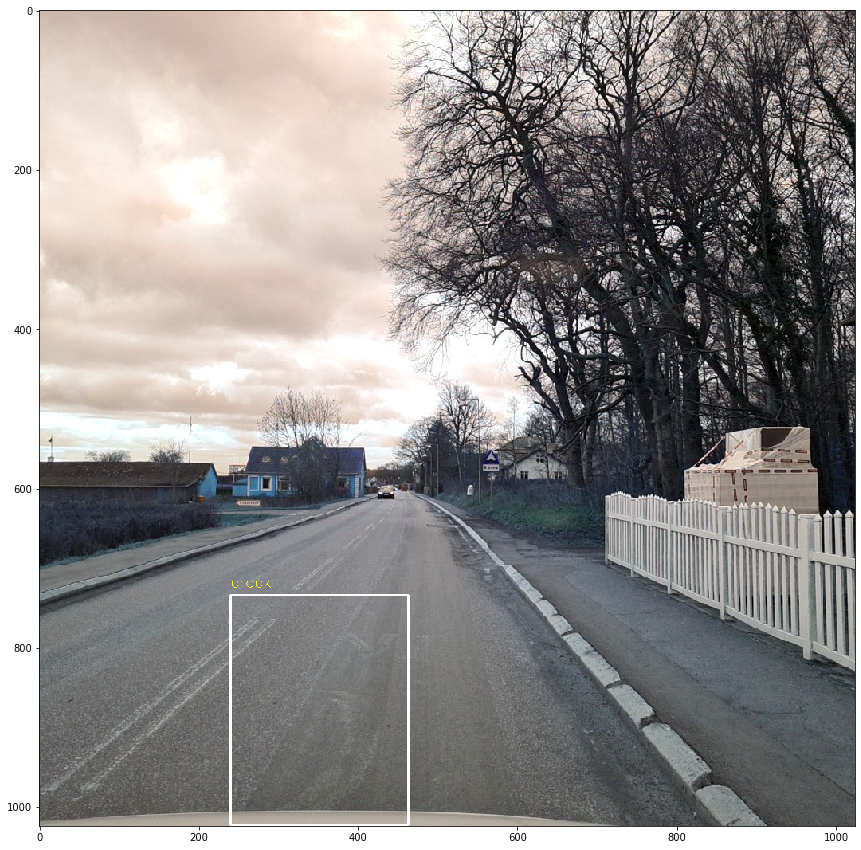

In [7]:
output_img = one_frame.copy()
for row in frame_boxes_df.values.tolist():
    x1 = float(row[2]) - 1
    y1 = float(row[3]) - 1
    x2 = float(row[4]) - 1 + x1
    y2 = float(row[5]) - 1 + y1
    draw_bounding(output_img, int(x1), int(x2), int(y1), int(y2), "crack")
print_img(output_img)

In [8]:
fourcc = cv2.VideoWriter_fourcc(*"MJPG")
writer = cv2.VideoWriter("tracktor_video.avi", fourcc, 30, (1024, 1024), True)
for i in range(100):
    one_frame = get_img(file_path[i])
    frame_boxes_df = model_output[model_output["1"] == i]
    output_img = one_frame.copy()
    for row in frame_boxes_df.values.tolist():
        x1 = float(row[2]) - 1
        y1 = float(row[3]) - 1
        x2 = float(row[4]) - 1 + x1
        y2 = float(row[5]) - 1 + y1
        draw_bounding(output_img, int(x1), int(x2), int(y1), int(y2), "Object " + str(row[1]))
    writer.write(output_img)
writer.release()


In [9]:
model_output["1"]

0        2
1        3
2        4
3        5
4        4
      ... 
279     96
280     97
281     98
282     99
283    100
Name: 1, Length: 284, dtype: int64